# Dubai Real Estate Property Listings Analysis
In this project we will look at latest (Apr 2025) property listings in Dubai.

## About the Dataset
*Source*: [Kaggle - Dubai Property Listings](https://www.kaggle.com/datasets/thapasajan/dubai-real-estate-property-listings)
> This dataset contains curated property listings from Dubai, UAE, showcasing various real estate options including apartments, studios, and townhouses. The data provides a snapshot of the vibrant Dubai property market, covering a range of attributes such as price, size, number of bedrooms and bathrooms, furnishing status, and project handover dates.

## 1. Importing of the Libraries and the Dataset


In [3]:
# Importing of Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

print('Libraries imported successfully')

Libraries imported successfully


In [4]:
# Importing of Dataset
df = pd.read_csv('data/dubai_realestate_dataset.csv')

print("Dataset imported successfully")

Dataset imported successfully


## 2. Data Overview

In [5]:
# View Data
df.head()

,price,bedroom,bathroom,area(sqft),country,city,address,propert_type,purpose,furnishing,completion_status,handover,project_name
0,"1,800,000",3 beds,4 baths,"1,208 sqft",UAE,Dubai,DAMAC Hills 2 (Akoya by DAMAC),Townhouse,Sale,Unfurnished,Off-Plan,Q2 2025,Camelia Villas
1,"325,000",Studio,1 bath,483 sqft,UAE,Dubai,International City,Apartment,Sale,Unfurnished,Ready,Q2 2025,Camelia Villas
2,"470,000",Studio,1 bath,428 sqft,UAE,Dubai,Arjan,Apartment,Sale,Furnished,Ready,Q2 2025,Camelia Villas
3,"1,120,000",1 bed,1 bath,706 sqft,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas
4,"2,127,888",2 beds,2 baths,"1,149 sqft",UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas


In [6]:
# Check dataset shape
print(f"Dataset Shape (rows, cols): {df.shape}")

# check dataset column names
print("Column Names:\n", df.columns.tolist())

Dataset Shape (rows, cols): (5380, 13)
Column Names:
 ['price', 'bedroom', 'bathroom', 'area(sqft)', 'country', 'city', 'address', 'propert_type', 'purpose', 'furnishing', 'completion_status', 'handover', 'project_name']


In [7]:
# Info about dataset (types and non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   price              5380 non-null   object
 1   bedroom            5380 non-null   object
 2   bathroom           5380 non-null   object
 3   area(sqft)         5380 non-null   object
 4   country            5380 non-null   object
 5   city               5380 non-null   object
 6   address            5380 non-null   object
 7   propert_type       5380 non-null   object
 8   purpose            5380 non-null   object
 9   furnishing         5380 non-null   object
 10  completion_status  5380 non-null   object
 11  handover           5380 non-null   object
 12  project_name       5380 non-null   object
dtypes: object(13)
memory usage: 546.5+ KB


In [8]:
# Basic Statistics
df.describe(include='all')

,price,bedroom,bathroom,area(sqft),country,city,address,propert_type,purpose,furnishing,completion_status,handover,project_name
count,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380
unique,1315,11,12,1601,1,1,119,6,1,2,2,25,868
top,"1,800,000",1 bed,2 baths,792 sqft,UAE,Dubai,Business Bay,Apartment,Sale,Unfurnished,Ready,Q4 2026,The Cosmopolitan (Damac Maison)
freq,70,1811,1739,26,5380,5380,585,4404,5380,3821,2758,723,94


## 3. Data Cleaning & Transformation

### Column Names Edits

In [9]:
# make column names consistent (lowercase and underscore)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

df.columns

Index(['price', 'bedroom', 'bathroom', 'areasqft', 'country', 'city',
       'address', 'propert_type', 'purpose', 'furnishing', 'completion_status',
       'handover', 'project_name'],
      dtype='object')

In [10]:
# change areasqft col to area_sqft
df.rename(columns={"areasqft": "area_sqft"}, inplace=True)

df.columns

Index(['price', 'bedroom', 'bathroom', 'area_sqft', 'country', 'city',
       'address', 'propert_type', 'purpose', 'furnishing', 'completion_status',
       'handover', 'project_name'],
      dtype='object')

In [11]:
# change propert_type to property_type
df.rename(columns={'propert_type': 'property_type'}, inplace=True)

df.columns

Index(['price', 'bedroom', 'bathroom', 'area_sqft', 'country', 'city',
       'address', 'property_type', 'purpose', 'furnishing',
       'completion_status', 'handover', 'project_name'],
      dtype='object')

### Numeric Columns Edits

In [12]:
# Removing commas and convert to numeric values
print(f"Before transformation: {df['price'].head(1)}")

df['price'] = df['price'].replace(r'[\D]', '', regex=True).astype(float)

print(f"After transformation: {df['price'].head(1)}")

Before transformation: 0    1,800,000
Name: price, dtype: object
After transformation: 0    1800000.0
Name: price, dtype: float64


In [13]:
# Extract numeric values from 'bedroom','bathroom' and 'area' cols
df['bedrooms'] = df['bedroom'].str.extract(r'(\d+)').astype(float)
df['bathrooms'] = df['bathroom'].str.extract(r'(\d+)').astype(float)
df['area_sqft'] = df['area_sqft'].str.replace(',', '').str.extract(r'(\d+(?:\.\d+)?)').astype(float)

print(df["bedrooms"].head())
print(df["bathrooms"].head())
print(df["area_sqft"].head())

0    3.0
1    NaN
2    NaN
3    1.0
4    2.0
Name: bedrooms, dtype: float64
0    4.0
1    1.0
2    1.0
3    1.0
4    2.0
Name: bathrooms, dtype: float64
0    1208.0
1     483.0
2     428.0
3     706.0
4    1149.0
Name: area_sqft, dtype: float64


In [14]:
# Check for NaN values
df.isna().sum()

price                  0
bedroom                0
bathroom               0
area_sqft              0
country                0
city                   0
address                0
property_type          0
purpose                0
furnishing             0
completion_status      0
handover               0
project_name           0
bedrooms             769
bathrooms              0
dtype: int64

In [15]:
# The reason for NaN values in the bedroom column is because the property type is 'studio', so we will change those to 0
df['bedrooms'] = df['bedrooms'].fillna(0)

df.isna().sum()

price                0
bedroom              0
bathroom             0
area_sqft            0
country              0
city                 0
address              0
property_type        0
purpose              0
furnishing           0
completion_status    0
handover             0
project_name         0
bedrooms             0
bathrooms            0
dtype: int64

### Clean Location Data

In [16]:
# Strip Whitespaces
df['country'] = df['country'].str.strip()
df['city'] = df['city'].str.strip()
df['address'] = df['address'].str.strip()

### Standardize Categorical Columns

In [17]:
categorical_cols = ['property_type', 'purpose', 'furnishing', 'completion_status']

for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower().str.replace("-", " ").replace("_", " ")

# capitalize
df['purpose'] = df['purpose'].str.title()
df['furnishing'] = df['furnishing'].str.title()
df['property_type'] = df['property_type'].str.title()
df['completion_status'] = df['completion_status'].str.title()

# review
df[['property_type', 'purpose', 'furnishing', 'completion_status']].head()

,property_type,purpose,furnishing,completion_status
0,Townhouse,Sale,Unfurnished,Off Plan
1,Apartment,Sale,Unfurnished,Ready
2,Apartment,Sale,Furnished,Ready
3,Apartment,Sale,Unfurnished,Off Plan
4,Apartment,Sale,Unfurnished,Off Plan


### Parsing Dates

In [18]:
# Split "Q2 2025" into quarter and year
df[['handover_quarter', 'handover_year']] = df['handover'].str.extract(r"(Q\d)\s+(\d{4})")
df.head()

,price,bedroom,bathroom,area_sqft,country,city,address,property_type,purpose,furnishing,completion_status,handover,project_name,bedrooms,bathrooms,handover_quarter,handover_year
0,1800000.0,3 beds,4 baths,1208.0,UAE,Dubai,DAMAC Hills 2 (Akoya by DAMAC),Townhouse,Sale,Unfurnished,Off Plan,Q2 2025,Camelia Villas,3.0,4.0,Q2,2025
1,325000.0,Studio,1 bath,483.0,UAE,Dubai,International City,Apartment,Sale,Unfurnished,Ready,Q2 2025,Camelia Villas,0.0,1.0,Q2,2025
2,470000.0,Studio,1 bath,428.0,UAE,Dubai,Arjan,Apartment,Sale,Furnished,Ready,Q2 2025,Camelia Villas,0.0,1.0,Q2,2025
3,1120000.0,1 bed,1 bath,706.0,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off Plan,Q3 2029,Camelia Villas,1.0,1.0,Q3,2029
4,2127888.0,2 beds,2 baths,1149.0,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off Plan,Q3 2029,Camelia Villas,2.0,2.0,Q3,2029


In [19]:
# Convert year into int
df['handover_year'] = df['handover_year'].astype(int)

### Check for missing or duplicates

In [20]:
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])

Missing Values:
 Series([], dtype: int64)


In [21]:
# duplicates
duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1942


In [22]:
all_duplicated = df[df.duplicated(keep=False)]
# Sort these rows to group duplicates together
all_duplicated_sorted = all_duplicated.sort_values(by=all_duplicated.columns.tolist())
print(all_duplicated_sorted)

           price bedroom bathroom  area_sqft country   city  \
1969    330000.0  Studio   1 bath      380.0     UAE  Dubai   
2037    330000.0  Studio   1 bath      380.0     UAE  Dubai   
3375    440000.0  Studio   1 bath      475.0     UAE  Dubai   
3383    440000.0  Studio   1 bath      475.0     UAE  Dubai   
1945    475000.0  Studio   1 bath      484.0     UAE  Dubai   
...          ...     ...      ...        ...     ...    ...   
837   57500000.0  4 beds  5 baths     7191.0     UAE  Dubai   
1031  57500000.0  4 beds  5 baths     7191.0     UAE  Dubai   
1160  57500000.0  4 beds  5 baths     7191.0     UAE  Dubai   
297   60808800.0  4 beds  6 baths    15202.0     UAE  Dubai   
342   60808800.0  4 beds  6 baths    15202.0     UAE  Dubai   

                          address property_type purpose   furnishing  \
1969  Dubai Investment Park (DIP)     Apartment    Sale  Unfurnished   
2037  Dubai Investment Park (DIP)     Apartment    Sale  Unfurnished   
3375  Dubai Investment Park

In [23]:
# remove duplicates
df.drop_duplicates(inplace=True)

### Exporting Final CSV for Dashboard

In [24]:
df.to_csv('data/dubai_realestate_cleaned.csv', index=False)
print("✅ Data cleaning complete and saved as 'dubai_realestate_cleaned.csv'")

✅ Data cleaning complete and saved as 'dubai_realestate_cleaned.csv'


## 4. Exploratory Data Analysis (EDA)
### Distribution of Property Prices

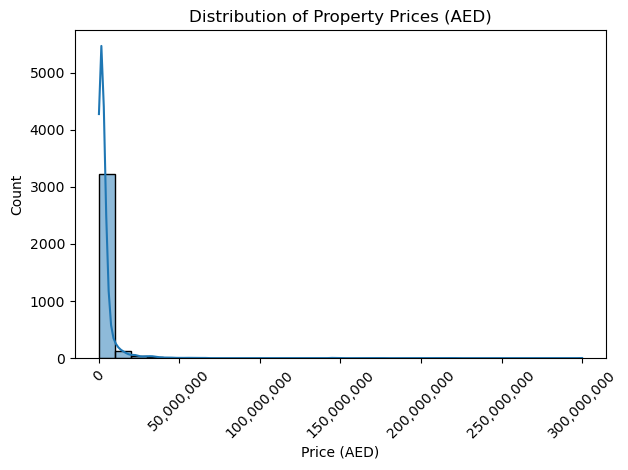

In [25]:
ax = sns.histplot(df['price'], bins=30, kde=True)

# format x axis
def format_aed(x, pos):
    return f'{int(x):,}'

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_aed))

plt.title("Distribution of Property Prices (AED)")
plt.xticks(rotation=45)
plt.xlabel("Price (AED)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Average Price by Property Type

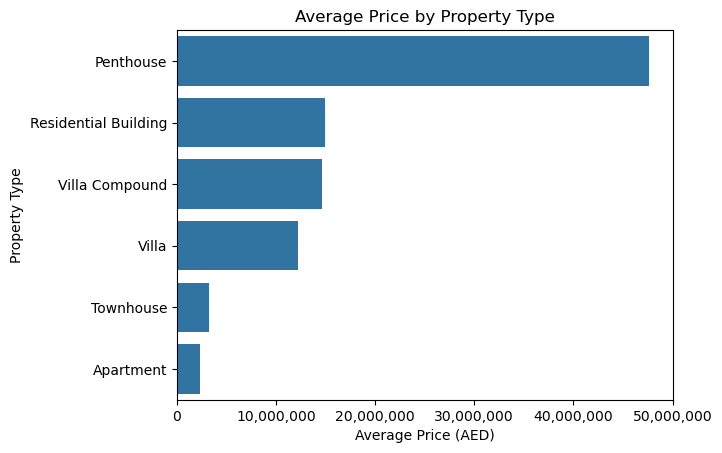

In [26]:
avg_price = df.groupby('property_type')['price'].mean().sort_values(ascending=False)
ax = sns.barplot(x=avg_price.values, y=avg_price.index)

# format x axis
def format_aed(x, pos):
    return f'{int(x):,}'

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_aed))

plt.title("Average Price by Property Type")
plt.xlabel("Average Price (AED)")
plt.ylabel("Property Type")
plt.show()

### Top 10 most expensive projects

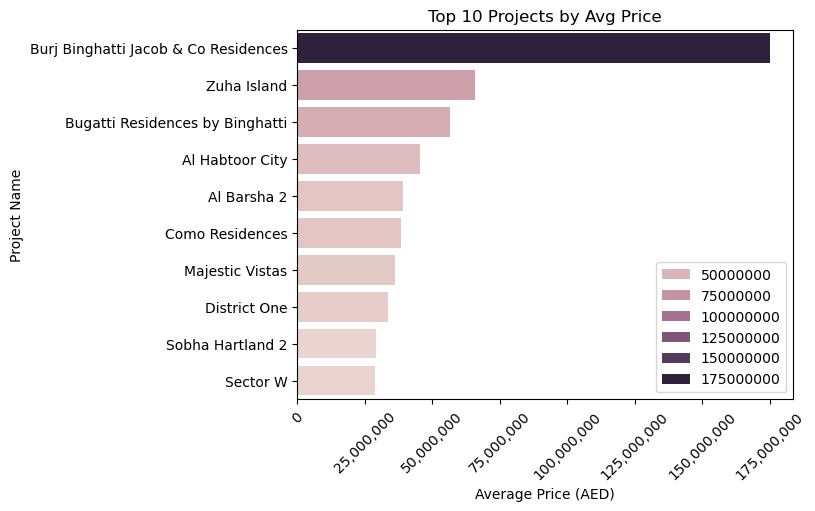

In [27]:
top_projects = df.groupby('project_name')['price'].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x=top_projects.values, y=top_projects.index, hue=top_projects.values)

# format x axis
def format_aed(x, pos):
    return f'{int(x):,}'

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_aed))

plt.title("Top 10 Projects by Avg Price")
plt.xticks(rotation=45)
plt.xlabel("Average Price (AED)")
plt.ylabel("Project Name")
plt.show()

### Completion Status

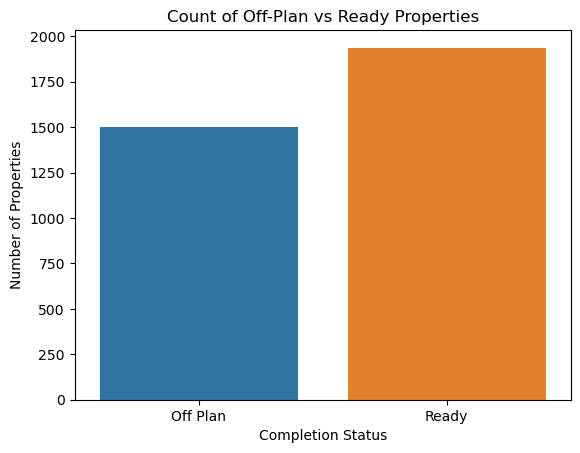

In [28]:
sns.countplot(x='completion_status', hue="completion_status", data=df)
plt.title("Count of Off-Plan vs Ready Properties")
plt.xlabel("Completion Status")
plt.ylabel("Number of Properties")
plt.show()

### Number of Listing by Handover

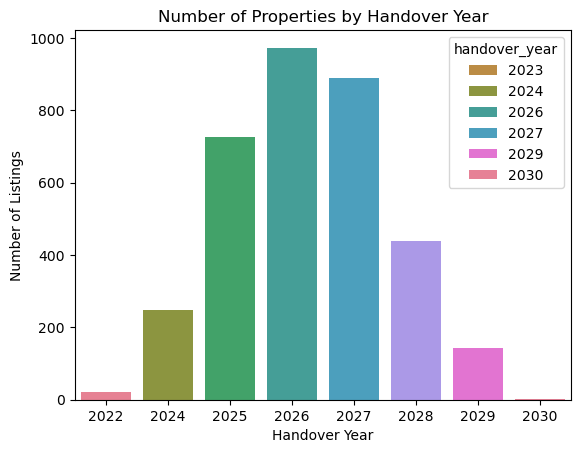

In [29]:
handover_counts = df['handover_year'].value_counts().sort_index()
sns.barplot(x=handover_counts.index, y=handover_counts.values, palette='husl', hue=handover_counts.index)
plt.title("Number of Properties by Handover Year")
plt.xlabel("Handover Year")
plt.ylabel("Number of Listings")
plt.show()